<a href="https://colab.research.google.com/github/Marwa-Chouhdary/Python-Projects/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IRIS FLOWER CLASSIFICATION

#Load the Dataset

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
# Load the dataset
iris = load_iris()


In [3]:
# Create a DataFrame for better visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [4]:
# Map species to their names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


#Preprocessing


##Check for Missing Values

In [19]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


##Normalize the Data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Replace original features with scaled features
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
df_scaled['species'] = iris.target

##Encode the Target Variable

In [23]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(np.array(y).reshape(-1, 1))


#Exploratory Data Analysis

##Visualize Class Distributions:

<ipython-input-25-3a49ce281fa4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='Set2')


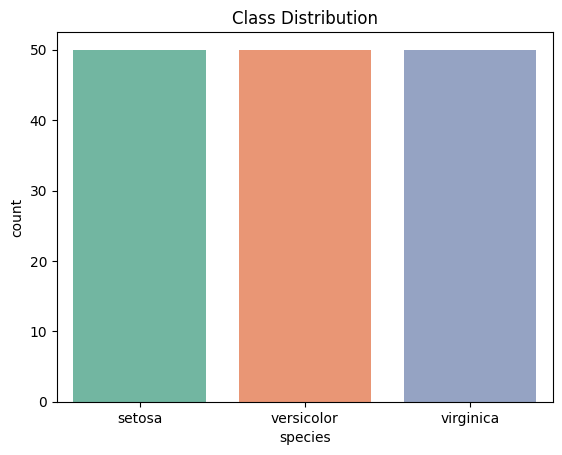

In [25]:
sns.countplot(x='species', data=df, palette='Set2')
plt.title('Class Distribution')
plt.show()

##Correlation Analysis

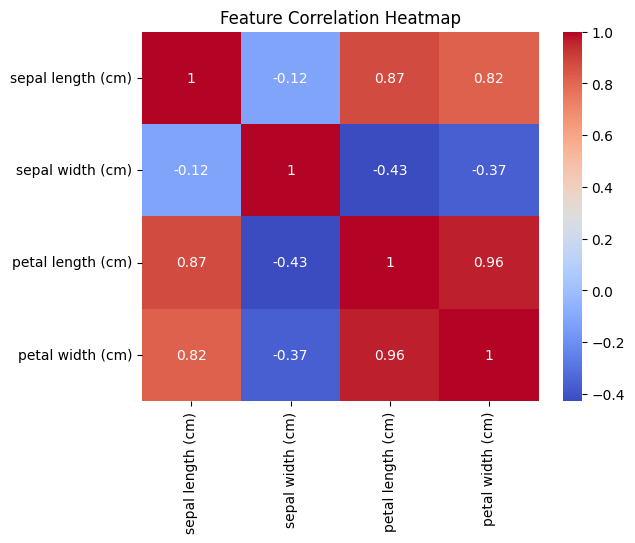

In [26]:
import numpy as np
correlation_matrix = df.iloc[:, :-1].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


##Pairplot Visualization

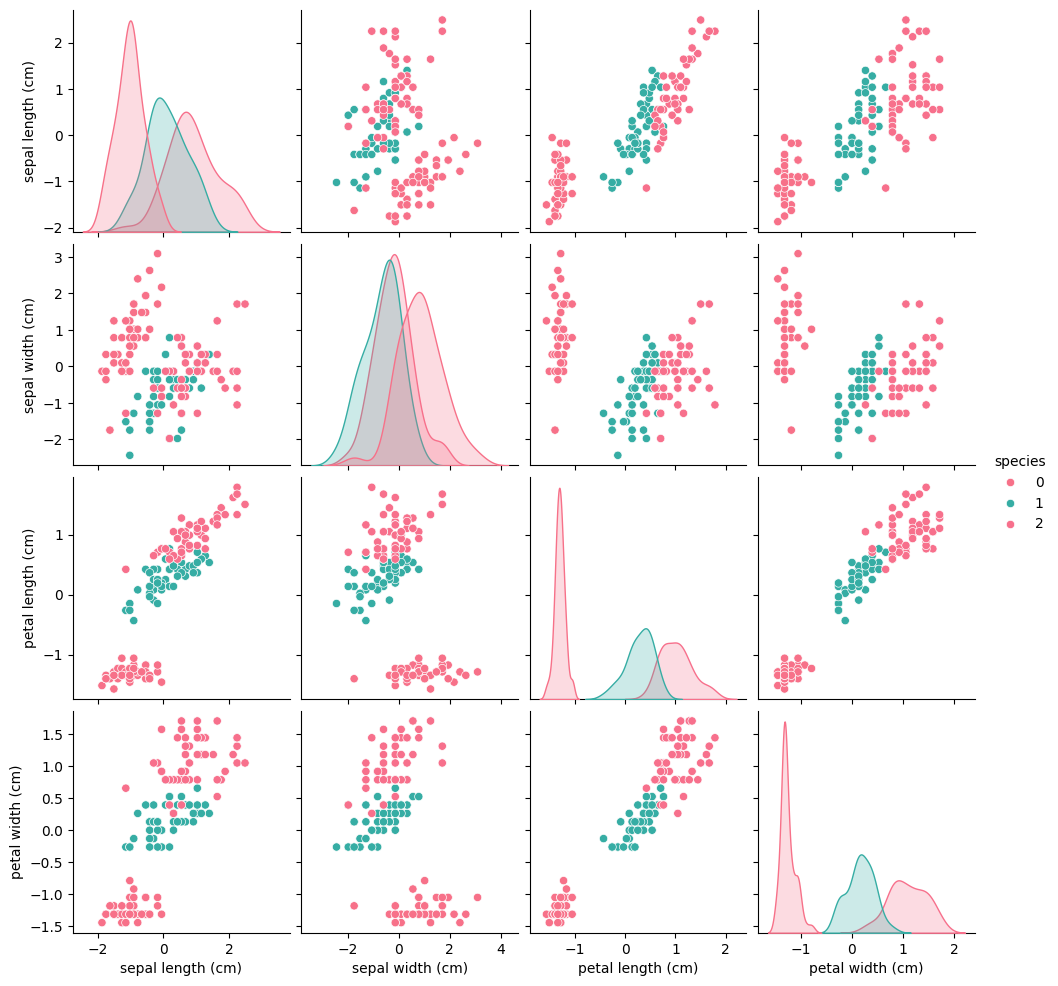

In [27]:
sns.pairplot(df_scaled, hue='species', palette='husl')
plt.show()


##Boxplots to Analyze Outliers

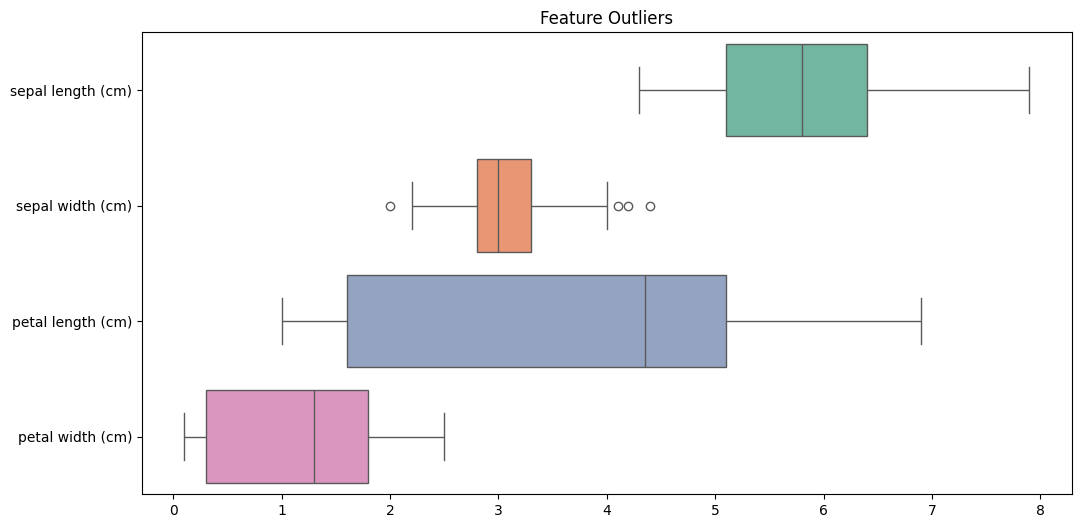

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1], orient="h", palette="Set2")
plt.title('Feature Outliers')
plt.show()


#Feature Engineering

In [31]:
#Combine features to form ratios, e.g., petal area
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']

In [32]:
#Add ratios
df['petal_length_width_ratio'] = df['petal length (cm)'] / df['petal width (cm)']
df['sepal_length_width_ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']


##Feature Selection Using PCA

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


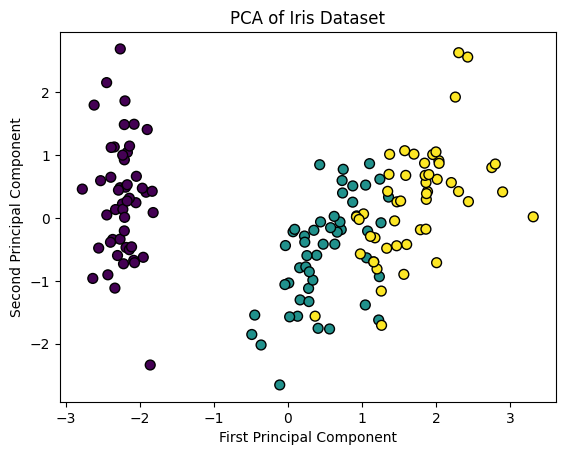

In [34]:
# Visualize PCA-reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Augment Data

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


#Apply Advanced Models

##Train Using Grid Search or Randomized Search for Hyperparameter Optimization

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Best Score: 0.95


##Use Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

print("Gradient Boosting Accuracy:", gb_model.score(X_test, y_test))


Gradient Boosting Accuracy: 1.0


#Model Explainability

##SHAP for Feature Importance

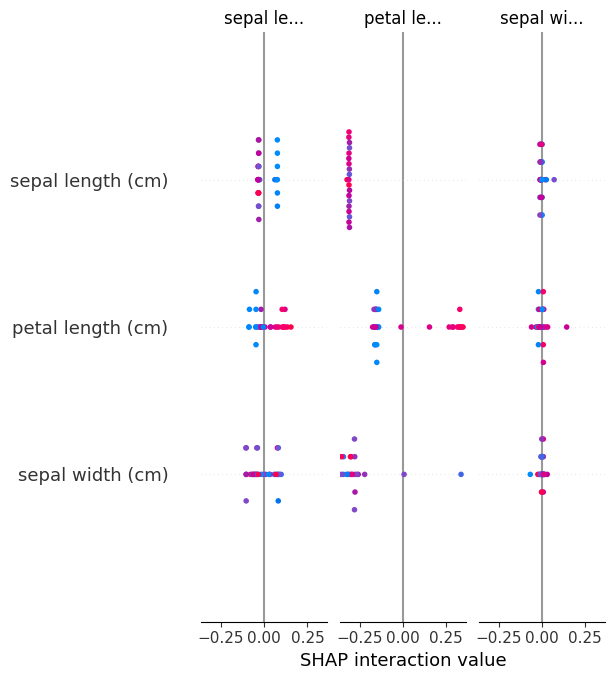

In [41]:
import numpy as np

# Ensure feature names are a NumPy array
feature_names = np.array(iris.feature_names)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


##Permutation Importance

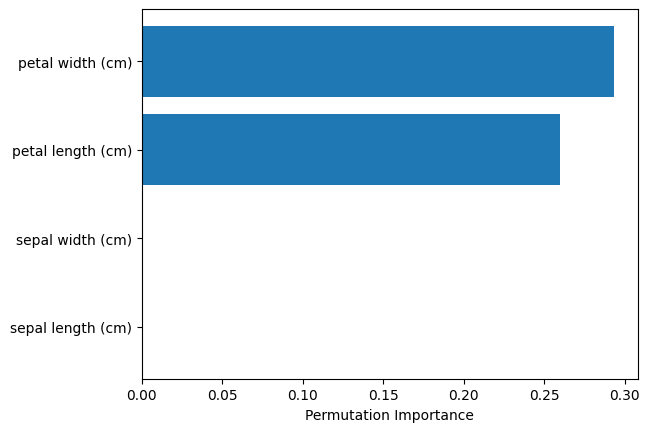

In [42]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(iris.feature_names, perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()
